<a href="https://colab.research.google.com/github/Leanse1/56_Secure/blob/main/56_Secure_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/56_Secure

/content/gdrive/MyDrive/56_Secure


In [ ]:
!ls

model.png  test  train


In [ ]:
BATCH_SIZE = 16
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=10

In [ ]:
import numpy as np
import tensorflow as tf
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D

In [ ]:
train_dataset = '/content/gdrive/MyDrive/56_Secure/train'
test_dataset = '/content/gdrive/MyDrive/56_Secure/test'


# Create a dataset from the directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 120 files belonging to 3 classes.
Found 25 files belonging to 3 classes.


In [ ]:
for image, label in train_ds.take(1):
    print(image.shape)
    print(label.numpy())

(16, 256, 256, 3)
[1 0 2 2 2 1 2 1 0 1 1 0 1 0 0 1]


In [ ]:
class_names = train_ds.class_names
class_names

['bike', 'car', 'others']

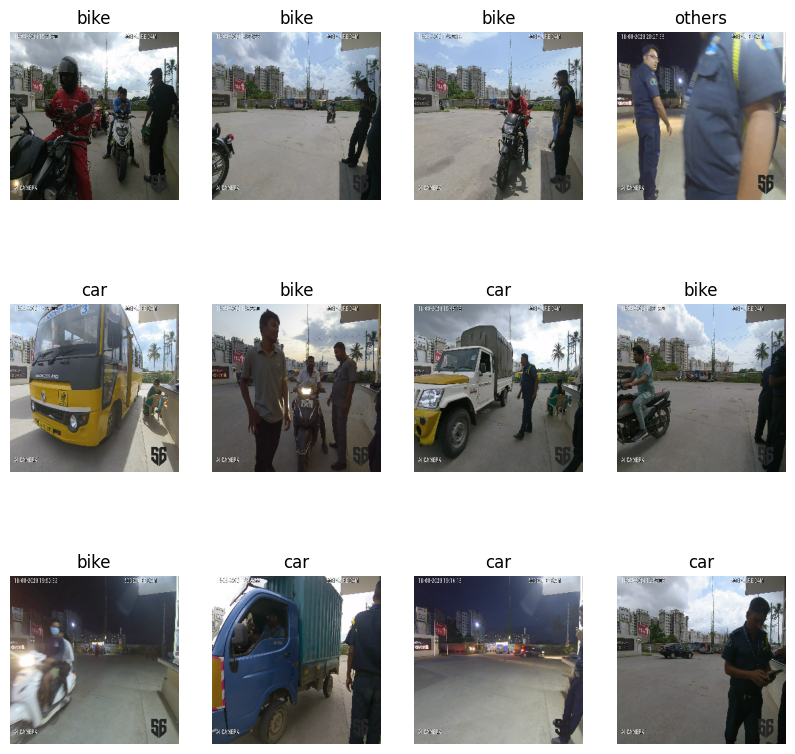

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()


In [ ]:
from tensorflow.keras import models,layers

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255), # It divides each pixel to a normalized range between 0 and 1.
])

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Assuming you have defined IMAGE_SIZE and CHANNELS elsewhere in your code
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3  # Number of classes

# Load pre-trained ResNet50 model with weights trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the convolutional layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of the base model
ResNet50_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')  # Adjust to the number of classes
])

ResNet50_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
history = ResNet50_model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=test_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
8/8 [==============================] - 62s 7s/step - loss: 0.8543 - accuracy: 0.6500 - val_loss: 0.5989 - val_accuracy: 0.8400
Epoch 2/10
8/8 [==============================] - 43s 5s/step - loss: 0.3864 - accuracy: 0.8333 - val_loss: 0.5095 - val_accuracy: 0.8000
Epoch 3/10
8/8 [==============================] - 40s 5s/step - loss: 0.2274 - accuracy: 0.8917 - val_loss: 0.5268 - val_accuracy: 0.8400
Epoch 4/10
8/8 [==============================] - 44s 5s/step - loss: 0.1689 - accuracy: 0.9333 - val_loss: 0.4316 - val_accuracy: 0.8400
Epoch 5/10
8/8 [==============================] - 44s 5s/step - loss: 0.1146 - accuracy: 0.9417 - val_loss: 0.4430 - val_accuracy: 0.8800
Epoch 6/10
8/8 [==============================] - 45s 6s/step - loss: 0.1106 - accuracy: 0.9583 - val_loss: 0.5011 - val_accuracy: 0.9200
Epoch 7/10
8/8 [==============================] - 45s 5s/step - loss: 0.0527 - accuracy: 0.9917 - val_loss: 0.4339 - val_accuracy: 0.8800
Epoch 8/10
8/8 [==================

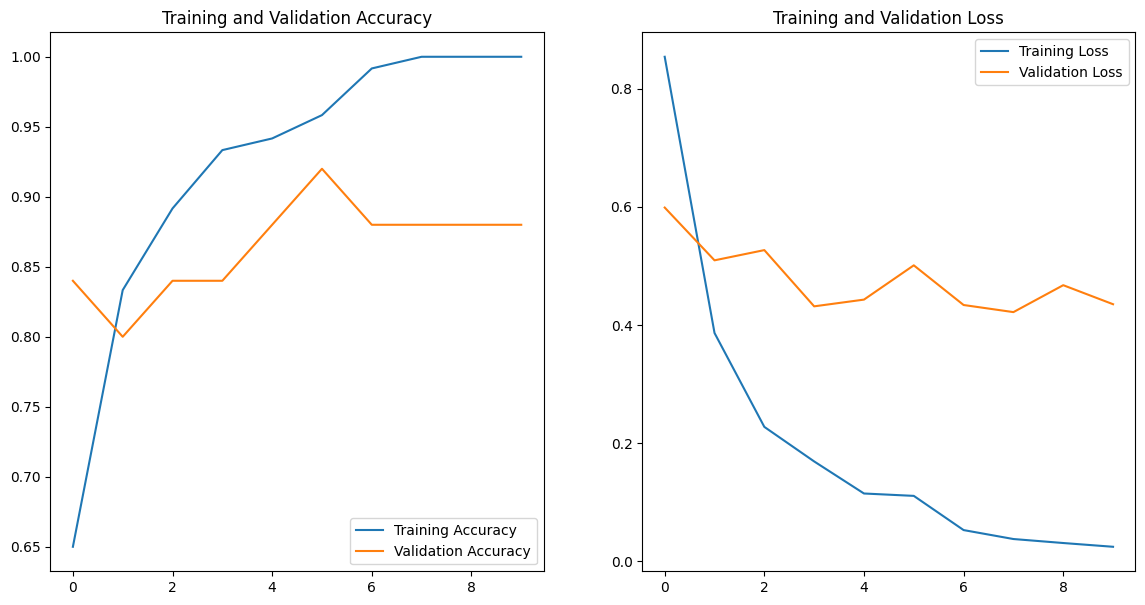

In [ ]:
def plot_model_loss_curves(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(10)

  plt.figure(figsize=(14, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

plot_model_loss_curves(history)

In [ ]:
all_predictions = []

for batch_images, _ in test_ds:
    # Assuming ResNet50_model is your model
    batch_predictions = ResNet50_model.predict(batch_images)
    all_predictions.append(batch_predictions)

# Concatenate predictions from all batches
predictions = np.concatenate(all_predictions, axis=0)


1/1 [==============================] - 2s 2s/step


In [ ]:
all_true_labels = []

for _, batch_labels in test_ds:
    all_true_labels.append(batch_labels)

# Concatenate true labels from all batches
true_labels = np.concatenate(all_true_labels, axis=0)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Convert softmax predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Build confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels))

# Plot confusion matrix using seaborn or other visualization tools


Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.20      0.21        10
           1       0.30      0.30      0.30        10
           2       0.17      0.20      0.18         5

    accuracy                           0.24        25
   macro avg       0.23      0.23      0.23        25
weighted avg       0.24      0.24      0.24        25



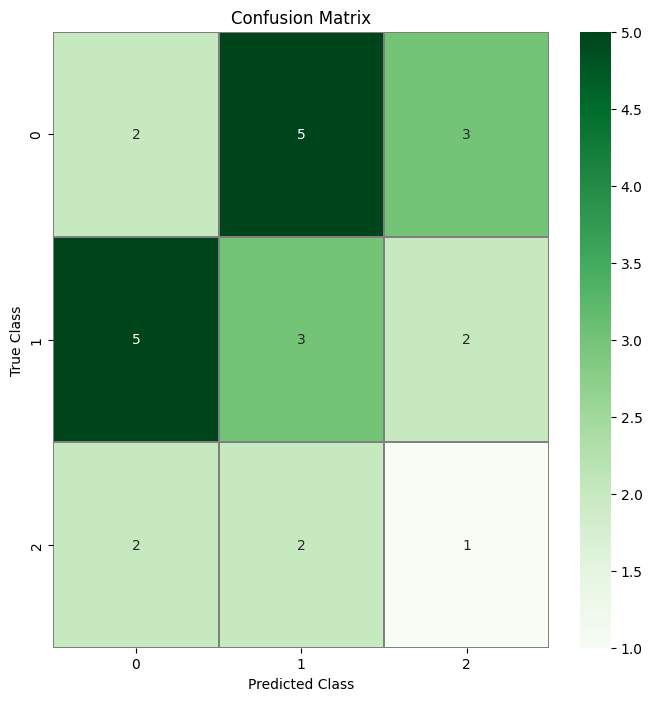

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true_labels and predicted_labels from your model
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Greens", linecolor="gray", linewidths=0.01, ax=ax)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()


2/2 [==============================] - 7s 2s/step


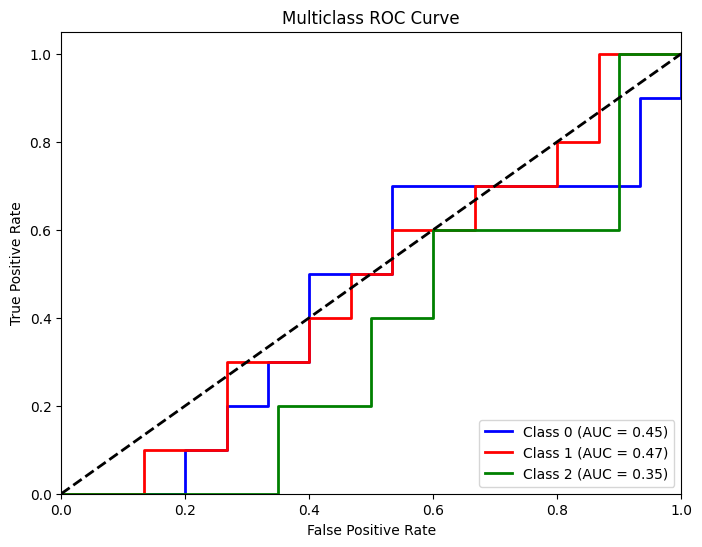

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming you have continuous probability estimates instead of predicted labels
predictions_proba = ResNet50_model.predict(test_ds)

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=[0, 1, 2])  # Adjust based on the number of classes

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = true_labels_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], predictions_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))

colors = cycle(['blue', 'red', 'green'])  # Add more colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()


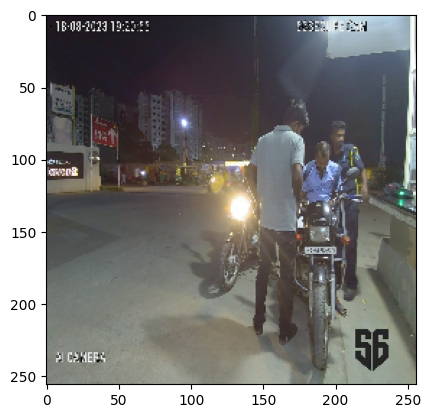

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))

first image to predict
actual label: car
1/1 [==============================] - 5s 5s/step
predicted label: car


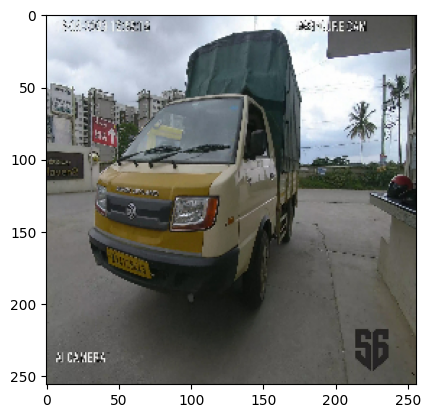

In [ ]:
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    print("actual label:",class_names[first_label])

    batch_prediction = ResNet50_model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    plt.imshow(first_image)

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 235ms/step


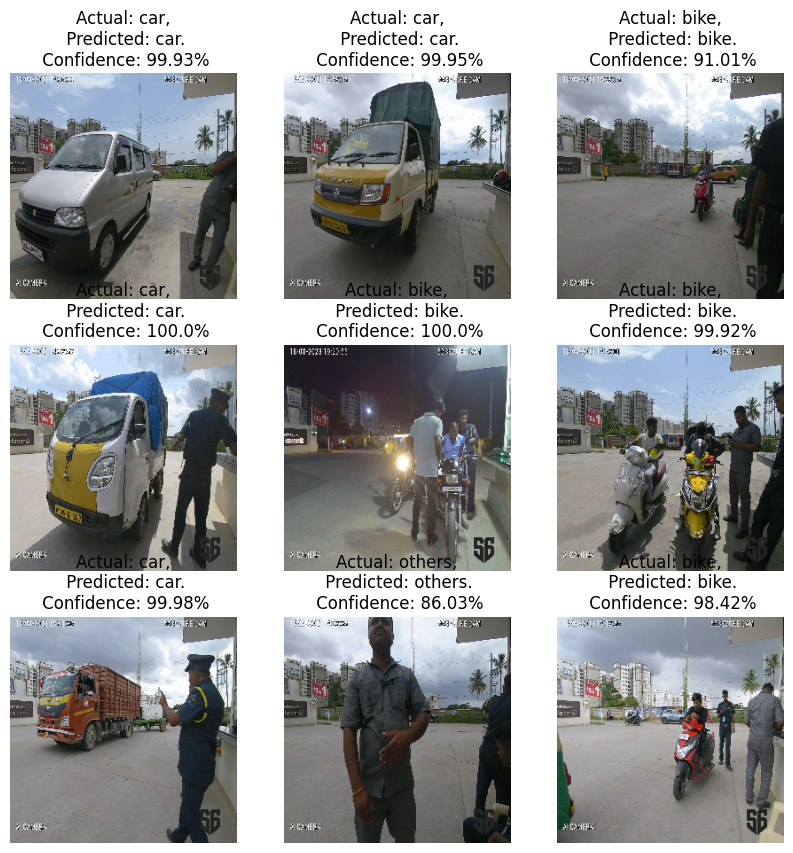

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(ResNet50_model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
model = ResNet50()

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_20 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_20[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
from keras.utils import plot_model
plot_model(model)

1/1 [==============================] - 0s 75ms/step


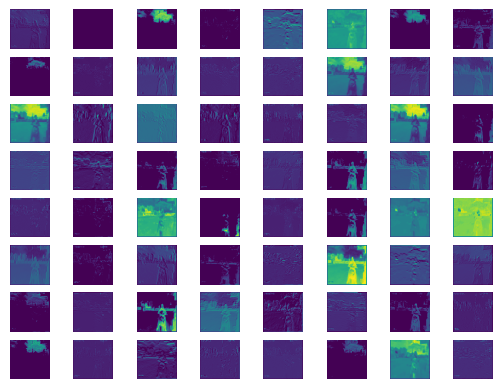

1/1 [==============================] - 0s 78ms/step


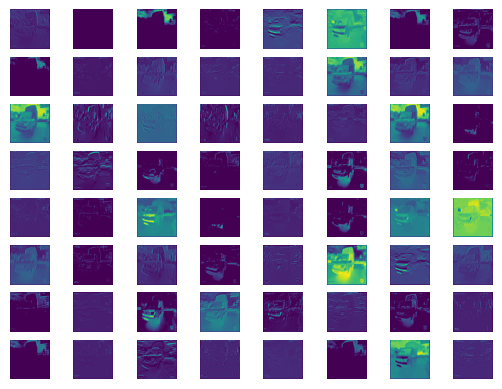

1/1 [==============================] - 0s 67ms/step


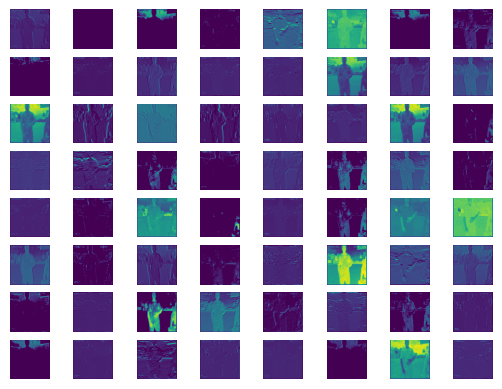

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input

# Function to load and preprocess the input image
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to visualize feature maps
def visualize_feature_maps(model, layer_number, input_image):
    # Create a model that outputs the feature maps of the specified layer
    intermediate_model = Model(inputs=model.input, outputs=model.layers[layer_number].output)

    # Preprocess the input image
    img_array = load_and_preprocess_image(input_image)

    # Get the feature maps
    feature_maps = intermediate_model.predict(img_array)

    # Plot the feature maps
    square = int(np.ceil(np.sqrt(feature_maps.shape[3])))
    # fig, axes = plt.subplots(square, square, figsize=(15, 15))
    for i in range(feature_maps.shape[3]):
        plt.subplot(square, square, i + 1)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.show()

# Load the pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet')

# Specify the layer number for which you want to visualize feature maps
layer_to_visualize = 5  # You can change this to the desired layer number

# Specify the path to the input image
bike_image_path = '/content/gdrive/MyDrive/56_Secure/test/bike/pfva_dataset_file_G_18082023_125813_48.jpg'
car_image_path = '/content/gdrive/MyDrive/56_Secure/test/car/pfva_dataset_file_G_18082023_125813_10.jpg'
others_image_path = '/content/gdrive/MyDrive/56_Secure/test/others/pfva_dataset_file_G_18082023_130313_4.jpg'

# Visualize feature maps
visualize_feature_maps(resnet_model, layer_to_visualize, bike_image_path)
visualize_feature_maps(resnet_model, layer_to_visualize, car_image_path)
visualize_feature_maps(resnet_model, layer_to_visualize, others_image_path)


In [77]:
model.save("56_secure.keras")